### Introduction to Groupping
 kaggle link for dataset "https://www.kaggle.com/c/rossmann-store-sales/data?select=train.csv"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\Sonu Shaikh\\Downloads\\kaggle-large-datasets\\train.csv",low_memory=False,parse_dates=['Date'])


In [2]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
dfg = df.groupby('Store',as_index=False)
dfg

In [23]:
avg_sale = dfg.mean()
avg_sale.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
0,1,3.997877,3945.704883,467.646497,0.829087,0.382166,0.204883
1,2,3.997877,4122.991507,486.045648,0.832272,0.382166,0.177282
2,3,3.997877,5741.253715,620.286624,0.826964,0.382166,0.180467
3,4,3.997877,8021.769639,1100.057325,0.832272,0.382166,0.183652
4,5,3.997877,3867.110403,444.360934,0.826964,0.382166,0.182590


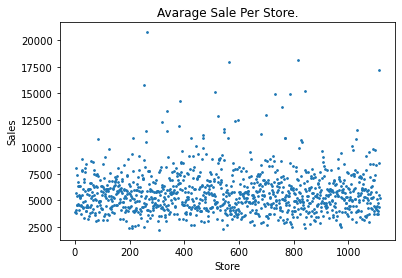

In [25]:
avg_sale.plot.scatter('Store','Sales',s=3,title='Avarage Sale Per Store.');

#### Multiple Groups

In [29]:
store_day = df.groupby(['Store','DayOfWeek'],as_index=False).mean()
store_day.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
0,1,1,4946.119403,567.768657,0.955224,0.537313,0.223881
1,1,2,4650.918519,545.370370,0.992593,0.533333,0.229630
2,1,3,4454.474074,530.407407,0.977778,0.533333,0.229630
3,1,4,4094.607407,493.407407,0.918519,0.533333,0.222222
4,1,5,4516.414815,537.259259,0.955556,0.533333,0.229630


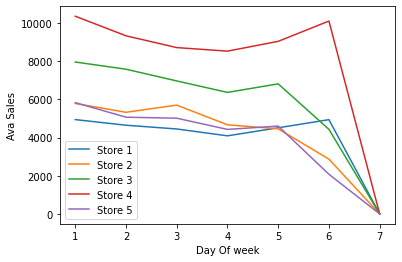

In [38]:
for store in df.Store.unique()[:5]:
    df_tmp = store_day[store_day.Store == store]
    plt.plot(df_tmp.DayOfWeek,df_tmp.Sales,label=f'Store {store}')
    plt.xlabel('Day Of week')
    plt.ylabel('Ava Sales')
    plt.legend();    

#### Contineous Groupping

In [43]:
df.groupby(['Sales']).mean().shape

(21734, 6)

In [44]:
df.Sales.describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [46]:
bins = [0,2000,4000,6000,8000,10000, 50000]

In [47]:
cut = pd.cut(df.Sales,bins,include_lowest=True)

In [49]:
df['SalesGroup'] = cut

In [54]:
df.groupby(['Store','Sales']).DayOfWeek.value_counts()

Store  Sales  DayOfWeek
1      0      7            134
              4             11
              1              6
              5              6
              3              3
                          ... 
1115   11641  1              1
       11673  5              1
       11768  1              1
       12214  2              1
       12491  1              1
Name: DayOfWeek, Length: 836808, dtype: int64

In [56]:
df.groupby(['Store','Sales']).DayOfWeek.value_counts().unstack(fill_value=0)

DayOfWeek    1  2  3   4  5  6    7
Store Sales                        
1     0      6  1  3  11  6  0  134
      2362   0  1  0   0  0  0    0
      2462   0  0  0   1  0  0    0
      2605   0  0  1   0  0  0    0
      2749   0  0  0   1  0  0    0
...         .. .. ..  .. .. ..  ...
1115  11641  1  0  0   0  0  0    0
      11673  0  0  0   0  1  0    0
      11768  1  0  0   0  0  0    0
      12214  0  1  0   0  0  0    0
      12491  1  0  0   0  0  0    0

[785931 rows x 7 columns]

In [58]:
df.groupby(['Store','SalesGroup','DayOfWeek']).Sales.count()

Store  SalesGroup          DayOfWeek
1      (-0.001, 2000.0]    1             6
                           2             1
                           3             3
                           4            11
                           5             6
                                        ..
1115   (10000.0, 50000.0]  3             1
                           4             2
                           5             7
                           6             2
                           7             0
Name: Sales, Length: 46830, dtype: int64

We can also user crosstab and pivot for these

#### Recap
* groupby
* reset_index
* cut
* unstack

### Single Aggregate Function
_Aggregation like mean,std,max,min,sum,meadian,etc <br/>
https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html_

In [2]:
df.groupby('Store').mean().head()

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,,,,,,
1,3.997877,3945.704883,467.646497,0.829087,0.382166,0.204883
2,3.997877,4122.991507,486.045648,0.832272,0.382166,0.177282
3,3.997877,5741.253715,620.286624,0.826964,0.382166,0.180467
4,3.997877,8021.769639,1100.057325,0.832272,0.382166,0.183652
5,3.997877,3867.110403,444.360934,0.826964,0.382166,0.182590


In [3]:
df.groupby('Store').max().head()

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Store,,,,,,,,
1,7,2015-07-31,9528,1130,1,1,c,1
2,7,2015-07-31,10682,1164,1,1,c,1
3,7,2015-07-31,15689,1579,1,1,c,1
4,7,2015-07-31,17412,2216,1,1,c,1
5,7,2015-07-31,11692,1081,1,1,c,1


In [4]:
df.groupby('Store').min().head()

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Store,,,,,,,,
1,1,2013-01-01,0,0,0,0,0,0
2,1,2013-01-01,0,0,0,0,0,0
3,1,2013-01-01,0,0,0,0,0,0
4,1,2013-01-01,0,0,0,0,0,0
5,1,2013-01-01,0,0,0,0,0,0


In [5]:
df.groupby('Store').std().head()

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,,,,,,
1,1.998404,2015.417840,228.930850,0.376633,0.486175,0.403831
2,1.998404,2363.628674,260.284503,0.373823,0.486175,0.382110
3,1.998404,3298.782559,323.366048,0.378479,0.486175,0.384780
4,1.998404,4012.592818,526.186981,0.373823,0.486175,0.387406
5,1.998404,2389.609890,253.050581,0.378479,0.486175,0.386535


In [6]:
c

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,,,,,,
1,3766,3716854,440523,781,360,193
2,3766,3883858,457855,784,360,167
3,3766,5408261,584310,779,360,170
4,3766,7556507,1036254,784,360,173
5,3766,3642818,418588,779,360,172


### Different Aggreate for Different Column
Welcome to the agg function. (can also user aggregate function)

In [7]:
df.groupby(['Store','DayOfWeek']).agg({'Store':'min','DayOfWeek':'max'}).head(10)

Store  DayOfWeek
Store DayOfWeek                  
1     1              1          1
      2              1          2
      3              1          3
      4              1          4
      5              1          5
      6              1          6
      7              1          7
2     1              2          1
      2              2          2
      3              2          3

In [14]:
#Multple actions on single columns
df.groupby(['Store','DayOfWeek']).agg({'Store':['min','max','count'],'Customers':'max'}).head()

Store           Customers
                  min max count       max
Store DayOfWeek                          
1     1             1   1   134      1130
      2             1   1   135       957
      3             1   1   135       828
      4             1   1   135       902
      5             1   1   135       895

In [17]:
df2 = df.groupby(['Store','DayOfWeek']).agg({'Store':['mean','max','count'],'Customers':'max'})
df2.head()

Store           Customers
                 mean max count       max
Store DayOfWeek                          
1     1             1   1   134      1130
      2             1   1   135       957
      3             1   1   135       828
      4             1   1   135       902
      5             1   1   135       895

In [20]:
#Explicitly changing the name of columns

df2.columns = ['Salemean','Salemax','Salecount','customermax']
df2.head()

Salemean  Salemax  Salecount  customermax
Store DayOfWeek                                           
1     1                 1        1        134         1130
      2                 1        1        135          957
      3                 1        1        135          828
      4                 1        1        135          902
      5                 1        1        135          895

In [22]:
#aggreate function with lambda function
mc_uncert = lambda x: np.std(x) / np.sqrt(x.size)
df2 = df.groupby(['Store','DayOfWeek']).agg({'Store':['min',mc_uncert],'Customers':'count'})
df2.head()

Store            Customers
                  min <lambda_0>     count
Store DayOfWeek                           
1     1             1          0       134
      2             1          0       135
      3             1          0       135
      4             1          0       135
      5             1          0       135

In [30]:
#<lambda_0> is nameless function we can change it's name in following manners without changing explicitly 
df2 = df.groupby(['Store','DayOfWeek']).agg({'Store':[('SalesMean','min'),('uncert',mc_uncert)], 'Customers':'count'})
df2.head()

Store        Customers
                SalesMean uncert     count
Store DayOfWeek                           
1     1                 1      0       134
      2                 1      0       135
      3                 1      0       135
      4                 1      0       135
      5                 1      0       135

In [33]:
# Pandas has update the agg syntax and it is recommended one (old one has depregated)
# And it won't works with lambda function so we have to defin normal function

def mc_uncert2(x):
    return np.std(x)/np.sqrt(x.size)

df3 = df.groupby(['Store','DayOfWeek'])
df3.agg(
    Salesmean = ('Sales','mean'),
    SalesUnsert = ('Sales',mc_uncert2)
).reset_index().head()

,Store,DayOfWeek,Salesmean,SalesUnsert
0,1,1,4946.119403,139.120367
1,1,2,4650.918519,94.412423
2,1,3,4454.474074,97.225056
3,1,4,4094.607407,129.367657
4,1,5,4516.414815,113.495466


The above method is the one currently recommended by the pandas team, so i'd encourage you to use it as it will be supported for the longest time. Hopefully

#### Recap
* groupby
* mean, max, min, meadian, etc
* agg(outputname=(inputcol,func)....)

#### Tipls to remebers:
1. Can gorup multiple levers
2. Group for samrt imputaion
3. Pandas has a ton of agg funcs
4. Use your own wih .agg